In [1]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

import numpy as np
import math 
import math as mt
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn import decomposition
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import os
import random

In [3]:
with open('test_fun.txt', 'w') as file:
    pd.read_excel('test_fun.xlsx').to_string(file, index=False,header=None)
    

In [4]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(12345)

xydata = open('test_fun.txt','r').readlines()

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
x10 = []
x11 = []
x12 = []
corrosion_rate= []


In [5]:
for line in xydata:
    x1.append(float(line.split()[0]))
    x2.append(float(line.split()[1]))
    x3.append(float(line.split()[2]))
    x4.append(float(line.split()[3]))
    x5.append(float(line.split()[4]))
    x6.append(float(line.split()[5]))
    x7.append(float(line.split()[6]))
    x8.append(float(line.split()[7]))
    x9.append(float(line.split()[8]))
    x10.append(float(line.split()[9]))
    x11.append(float(line.split()[10]))
    x12.append(float(line.split()[11]))
    corrosion_rate.append(float(line.split()[12]))
    
print ('read finished')

read finished


In [6]:
# dimensional DoE points
x_dim = (np.vstack([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])).transpose()

# Calculating number of DoE points for matrix x
n=int(x_dim.shape[0])

# Calculating number of dvs
ndv=int(x_dim.shape[1])
print ('n = {0:d} ndv = {1:d}'.format(n,ndv))

# scale x1 and x2 design variables to lie between 0 and 1
x1_scaled = []
x2_scaled = []
x3_scaled = []
x4_scaled = []
x5_scaled = []
x6_scaled = []
x7_scaled = []
x8_scaled = []
x9_scaled = []
x10_scaled = []
x11_scaled = []
x12_scaled = []


for i in range(0,n):
    x1_scaled.append((x1[i]-min(x1))/(max(x1)-min(x1)))
    x2_scaled.append((x2[i]-min(x2))/(max(x2)-min(x2)))
    x3_scaled.append((x3[i]-min(x3))/(max(x3)-min(x3)))
    x4_scaled.append((x4[i]-min(x4))/(max(x4)-min(x4)))
    x5_scaled.append((x5[i]-min(x5))/(max(x5)-min(x5)))
    x6_scaled.append((x6[i]-min(x6))/(max(x6)-min(x6)))
    x7_scaled.append((x7[i]-min(x7))/(max(x7)-min(x7)))
    x8_scaled.append((x8[i]-min(x8))/(max(x8)-min(x8)))
    x9_scaled.append((x9[i]-min(x9))/(max(x9)-min(x9)))
    x10_scaled.append((x10[i]-min(x10))/(max(x10)-min(x10)))
    x11_scaled.append((x11[i]-min(x11))/(max(x11)-min(x11)))
    x12_scaled.append((x12[i]-min(x12))/(max(x12)-min(x12)))
    

# # vector of scaled DoE points
x_nondim = (np.vstack([x1_scaled,x2_scaled,x3_scaled,x4_scaled,x5_scaled,\
                      x6_scaled,x7_scaled,x8_scaled,x9_scaled,x10_scaled,x11_scaled,x12_scaled])).transpose()
    
# array of floats needed for use in ANN functions
x_scaled = np.array(x_nondim,dtype='float64')

# Now scale the objectives to lie between 0 and 1: objective 1 =
minobj1 = min(corrosion_rate)
denom1 = (max(corrosion_rate)-min(corrosion_rate))

o1 = []
for i in range(0,len(corrosion_rate)):
    o1.append((corrosion_rate[i]-minobj1)/denom1)

n = 1000 ndv = 12


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, o1_train, o1_test = train_test_split(x_scaled, o1, test_size = 0.30)

# array of floats 
obj1 = np.array(o1_train,dtype='float64')

# import the regressor 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

# Instantiate a Gaussian Process model for corrosion rate

#kernel = 1.0 * RBF(1.0)

kernel = 1.0 * Matern(length_scale = 100.0, nu = 0.5)

gp_cr = GaussianProcessRegressor(kernel=kernel, alpha=1e-9,
optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0,
normalize_y=False, copy_X_train=True, random_state=None)

gp_cr.fit(x_train,obj1)

obj_pred,sigma = gp_cr.predict(x_test,return_std=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:1690: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


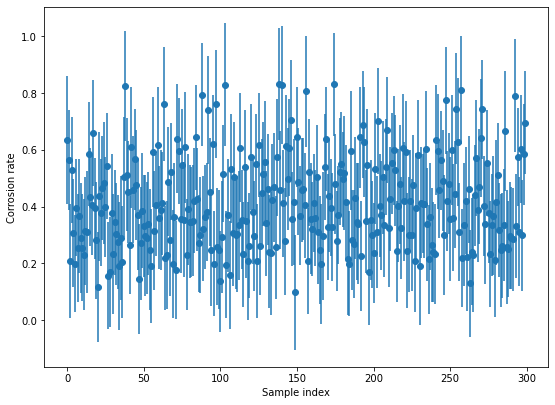

In [8]:
confidence = 1.96 * sigma

# Plot the data and the confidence interval


fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(7,5)

ax = fig.add_axes([0,0,1,1])


plt.errorbar(np.arange(len(obj_pred)), obj_pred, yerr=confidence, fmt='o')
plt.xlabel('Sample index')
plt.ylabel('Corrosion rate')
plt.show()

#fig.savefig('95percent_confidence_interval.jpg')

In [12]:
# ----------------------------------------------------------------------------------------
# Single objective optimisation of corrosion using Gaussian Processes
# ----------------------------------------------------------------------------------------

from scipy import optimize

def obj1_f(x): # function to be optimised
    xdash = np.zeros((1,12),dtype='float64') # need compatible data for optimizer
    xdash[0][0] = x[0]
    xdash[0][1] = x[1]
    xdash[0][2] = x[2]
    xdash[0][3] = x[3]
    xdash[0][4] = x[4]
    xdash[0][5] = x[5]
    xdash[0][6] = x[6]
    xdash[0][7] = x[7]
    xdash[0][8] = x[8]
    xdash[0][9] = x[9]
    xdash[0][10] = x[10]
    xdash[0][11] = x[11]
    return abs(gp_cr.predict(xdash))

# testing obj1_f for data input compatibility
x = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]


yval = obj1_f(x)
 
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))     # set optimisation bounds


optmethod = "Powell"   # set optimisation method

# optimise with scipy functions
if (optmethod=="Nelder-Mead"):
    res = optimize.minimize(obj1_f,x, bounds=bnds, method="Nelder-Mead")
elif (optmethod=="Powell"):
      res = optimize.minimize(obj1_f,x, bounds=bnds, method="Powell")

print("res success {0:5d}".format(res.success))
# print("optimal scaled points {0:10.5e} {1:10.5e} {2:10.5e} {3:10.5e} {4:10.5e}\
#       {5:10.5e} {6:10.5e} {7:10.5e} {8:10.5e} {9:10.5e} {10:10.5e} {11:10.5e}"\
#       .format(res.x[0], res.x[1], res.x[2], res.x[3], res.x[4], res.x[5], res.x[6],\
#               res.x[7], res.x[8], res.x[9], res.x[10], res.x[11]))
    
x1opt = res.x[0]*(max(x1)-min(x1))+min(x1)
x2opt = res.x[1]*(max(x2)-min(x2))+min(x2)
x3opt = res.x[2]*(max(x3)-min(x3))+min(x3)
x4opt = res.x[3]*(max(x4)-min(x4))+min(x4)
x5opt= res.x[4]*(max(x5)-min(x5))+min(x5)
x6opt = res.x[5]*(max(x6)-min(x6))+min(x6)
x7opt = res.x[6]*(max(x7)-min(x7))+min(x7)
x8opt = res.x[7]*(max(x8)-min(x8))+min(x8)
x9opt = res.x[8]*(max(x9)-min(x9))+min(x9)
x10opt = res.x[9]*(max(x10)-min(x10))+min(x10)
x11opt = res.x[10]*(max(x11)-min(x11))+min(x11)
x12opt = res.x[11]*(max(x12)-min(x12))+min(x12)


########### print optimized values of variables ############

print("Optimal values Erev_H = {0:10.5e} b_H = {1:10.5e} del_H = {2:10.5e} del_H2CO3 = {3:10.5e} Iref_H = {4:10.5e}\
      a1_H = {5:10.5e} Iref_H2CO3 = {6:10.5e} a1_H2CO3 = {7:10.5e} cCO2ref_Fe = {8:10.5e}\
          delH_Fe = {9:10.5e} Erev_Fe = {10:10.5e} b_Fe = {11:10.5e}"\
      .format(x1opt, x2opt, x3opt,x4opt, x5opt, x6opt, x7opt,\
              x8opt, x9opt, x10opt, x11opt, x12opt))

res success     1
Optimal values Erev_H = -1.86235e-01 b_H = 1.16807e-01 del_H = 2.70046e+04 del_H2CO3 = 4.60218e+04 Iref_H = 5.99877e-02      a1_H = 4.00112e-01 Iref_H2CO3 = 5.88541e-02 a1_H2CO3 = -5.47419e-01 cCO2ref_Fe = 3.53467e-02          delH_Fe = 4.18018e+04 Erev_Fe = -5.09290e-01 b_Fe = 3.66515e-02


In [13]:
data = {'Parameters':['Erev_H','b_H','del_H','del_H2CO3','Iref_H','a1_H','Iref_H2CO3','a1_H2CO3','cCO2ref_Fe','delH_Fe',
                     'Erev_Fe','b_Fe'],'Values':[x1opt,x2opt,x3opt,x4opt,x5opt,x6opt,x7opt,x8opt,x9opt,x10opt,x11opt,x12opt]}

In [14]:
df = pd.DataFrame(data)

df

,Parameters,Values
0,Erev_H,-0.186235
1,b_H,0.116807
2,del_H,27004.577238
3,del_H2CO3,46021.778318
4,Iref_H,0.059988
5,a1_H,0.400112
6,Iref_H2CO3,0.058854
7,a1_H2CO3,-0.547419
8,cCO2ref_Fe,0.035347
9,delH_Fe,41801.769005


In [14]:
#df.loc[0, 'Values'] = round(df.loc[0, 'Values'], 2)
df = df.round(3)

df.loc[2, 'Values'] = round(df.loc[2, 'Values'], 0)
df.loc[3, 'Values'] = round(df.loc[3, 'Values'], 0)
df.loc[9, 'Values'] = round(df.loc[9, 'Values'], 0)

In [15]:
#df.to_excel("GPR_optimal_values.xlsx")

In [16]:
df

,Parameters,Values
0,Erev_H,-0.187
1,b_H,0.116
2,del_H,27077.000
3,del_H2CO3,41740.000
4,Iref_H,0.060
5,a1_H,0.453
6,Iref_H2CO3,0.049
7,a1_H2CO3,-0.521
8,cCO2ref_Fe,0.034
9,delH_Fe,41979.000


Mean Square Error = 0.010195832072747324
Root Mean Square Error = 0.10097441296064723
R-sqaure = 0.7320892415388985


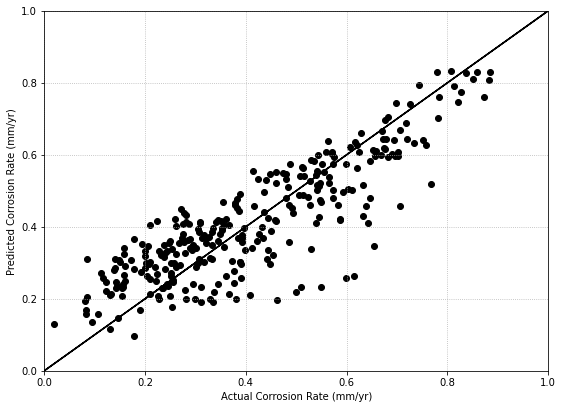

In [33]:
# calculate RMSE for cross validation
MSE = np.square(np.subtract(obj_pred,o1_test)).mean()   

print("Mean Square Error = {0:2}".format (MSE))  

RMSE = math.sqrt(MSE)  

print("Root Mean Square Error = {0:2}".format (RMSE))  

from sklearn.metrics import r2_score
R2= r2_score(o1_test,obj_pred)

print("R-sqaure = {0:2}".format (R2)) 


fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(7,5)

ax = fig.add_axes([0,0,1,1])

#plt.rc('grid', linestyle="-", color='black')

plt.plot(obj1,obj1,color='black')

plt.scatter(o1_test,obj_pred,marker="o",color='black')

plt.xlim(0,1)
plt.ylim(0,1)

# plt.legend (['Current model','Empirical correlation','Nesic et al.(1995)'], loc='upper left')

plt.xlabel ("Actual Corrosion Rate (mm/yr)")
plt.ylabel ("Predicted Corrosion Rate (mm/yr)")

plt.grid(linestyle=':')
    
#plt.savefig('GPR-Predictions',bbox_inches='tight', dpi=150)

plt.show()

In [18]:
# Custom Hooke-Jeeves optimization
def hooke_jeeves(obj_func, initial_x, step_size=0.1, tolerance=1e-8, max_iterations=1000):
    x = np.array(initial_x)
    n = len(x)

    for _ in range(max_iterations):
        f_x = obj_func(x)
        x_old = x.copy()

        for i in range(n):
            x[i] += step_size
            f_x_plus = obj_func(x)

            if f_x_plus < f_x:
                f_x = f_x_plus
            else:
                x[i] -= 2 * step_size
                f_x_minus = obj_func(x)

                if f_x_minus < f_x:
                    f_x = f_x_minus
                else:
                    x[i] += step_size

        if np.max(np.abs(x - x_old)) < tolerance:
            break

    return x, f_x

res_hookejeeves = hooke_jeeves(obj1_f, x, step_size=0.01, tolerance=1e-8)
print("Hooke-Jeeves optimization results:")
print("Optimal scaled points:", res_hookejeeves[0])
print("Optimal value:", res_hookejeeves[1])

Hooke-Jeeves optimization results:
Optimal scaled points: [0.97 0.02 0.27 0.12 0.97 0.03 0.21 0.24 0.04 0.23 0.04 0.04]
Optimal value: [1.7284453e-07]


In [20]:
# Define a function to reverse scaling for a single value
def reverse_scale(value, min_val, max_val):
    return value * (max_val - min_val) + min_val

In [21]:
# Reverse scaling for Hooke-Jeeves optimization results
x1_optimal_hj = reverse_scale(res_hookejeeves[0][0], min(x1), max(x1))
x2_optimal_hj = reverse_scale(res_hookejeeves[0][1], min(x2), max(x2))
x3_optimal_hj = reverse_scale(res_hookejeeves[0][2], min(x3), max(x3))
x4_optimal_hj = reverse_scale(res_hookejeeves[0][3], min(x4), max(x4))
x5_optimal_hj = reverse_scale(res_hookejeeves[0][4], min(x5), max(x5))
x6_optimal_hj = reverse_scale(res_hookejeeves[0][5], min(x6), max(x6))
x7_optimal_hj = reverse_scale(res_hookejeeves[0][6], min(x7), max(x7))
x8_optimal_hj = reverse_scale(res_hookejeeves[0][7], min(x8), max(x8))
x9_optimal_hj = reverse_scale(res_hookejeeves[0][8], min(x9), max(x9))
x10_optimal_hj = reverse_scale(res_hookejeeves[0][9], min(x10), max(x10))
x11_optimal_hj = reverse_scale(res_hookejeeves[0][10], min(x11), max(x11))
x12_optimal_hj = reverse_scale(res_hookejeeves[0][11], min(x12), max(x12))

In [22]:
data = {'Parameters':['Erev_H','b_H','del_H','del_H2CO3','Iref_H','a1_H','Iref_H2CO3','a1_H2CO3','cCO2ref_Fe','delH_Fe',
                     'Erev_Fe','b_Fe'],'Values':[x1_optimal_hj,x2_optimal_hj,x3_optimal_hj,x4_optimal_hj,x5_optimal_hj\
                                                 ,x6_optimal_hj,x7_optimal_hj,x8_optimal_hj,x9_optimal_hj,\
                                                 x10_optimal_hj,x11_optimal_hj,x12_optimal_hj]}

In [23]:
df_HJ = pd.DataFrame(data)

In [24]:
df_HJ

,Parameters,Values
0,Erev_H,-0.189017
1,b_H,0.101629
2,del_H,28622.698448
3,del_H2CO3,42398.672993
4,Iref_H,0.059390
5,a1_H,0.406095
6,Iref_H2CO3,0.053039
7,a1_H2CO3,-0.551995
8,cCO2ref_Fe,0.029870
9,delH_Fe,33460.517079
